In [20]:
FILE_SUFFIX = "CROPPED_IMAGES"

# Load Data

In [21]:
import pandas as pd

data = pd.read_csv('data_balanced_processed.csv', encoding="latin-1")
#data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,drummer,session,id,style,simplified_style,bpm,beat_type,time_signature,midi_filename,audio_filename,...,rms_std,spectral_centroid_mean,spectral_centroid_std,spectral_bandwidth_mean,spectral_bandwidth_std,spectral_flatness_mean,spectral_flatness_std,tempogram_mean,tempogram_std,spectrum_filename
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,funk,138,1,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,...,0.056157,5608.665252,2501.480437,4647.658427,941.263597,0.090434,0.124045,0.294583,0.171183,drummer1/eval_session/1_funk-groove1_138_beat_...
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,funk,102,1,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,...,0.062846,7204.425221,3338.747216,5212.773742,1194.914650,0.148189,0.143111,0.267859,0.234713,drummer1/eval_session/10_soul-groove10_102_bea...
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,funk,105,1,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,...,0.061557,6172.809370,3874.975566,4711.894615,1483.392124,0.116454,0.132516,0.238676,0.153792,drummer1/eval_session/2_funk-groove2_105_beat_...
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,funk,86,1,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,...,0.053402,5704.099294,3309.100713,5098.568553,1251.293005,0.101191,0.128717,0.149444,0.144291,drummer1/eval_session/3_soul-groove3_86_beat_4...
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,funk,80,1,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,...,0.046688,8042.372855,3504.921958,5396.953176,999.442925,0.181278,0.149775,0.115379,0.128980,drummer1/eval_session/4_soul-groove4_80_beat_4...


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   drummer                  1200 non-null   object 
 1   session                  1200 non-null   object 
 2   id                       1200 non-null   object 
 3   style                    1200 non-null   object 
 4   simplified_style         1200 non-null   object 
 5   bpm                      1200 non-null   int64  
 6   beat_type                1200 non-null   int64  
 7   time_signature           1200 non-null   object 
 8   midi_filename            1200 non-null   object 
 9   audio_filename           1200 non-null   object 
 10  duration                 1200 non-null   float64
 11  split                    1200 non-null   object 
 12  start                    1200 non-null   float64
 13  end                      1200 non-null   float64
 14  times_sampled           

# Prepare Data

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
data["encoded_style"] = label_encoder.fit_transform(data.simplified_style)
data.encoded_style.value_counts()

encoded_style
0    200
1    200
4    200
5    200
3    200
2    200
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

# Split the data
data_train, data_test = train_test_split(data, test_size=0.15, random_state=42)

# Split again into validation and test (Split is now 70/15/15)
data_test, data_validation = train_test_split(data_test, test_size=0.5, random_state=42,)
data_test.shape

(90, 39)

In [25]:
# check the distribution after the split
print(data_train.shape, data_test.shape, data_validation.shape, )
print("Train data share: ", data_train.shape[0] / data.shape[0])
print("Validation data share: ", data_validation.shape[0]/ data.shape[0])
print("Test data share: ", data_test.shape[0] / data.shape[0])

(1020, 39) (90, 39) (90, 39)
Train data share:  0.85
Validation data share:  0.075
Test data share:  0.075


# Convolutional Neural Network

Image Generators are the dataloaders for the CNN. They just define how the images are "fed" to the cnn, like where is the path to the images, what are the labels to predict

In [26]:
data_test.head()

,drummer,session,id,style,simplified_style,bpm,beat_type,time_signature,midi_filename,audio_filename,...,spectral_centroid_mean,spectral_centroid_std,spectral_bandwidth_mean,spectral_bandwidth_std,spectral_flatness_mean,spectral_flatness_std,tempogram_mean,tempogram_std,spectrum_filename,encoded_style
471,drummer7,drummer7/session3,drummer7/session3/130,soul,funk,105,1,4-4,drummer7/session3/130_soul_105_beat_4-4.mid,drummer7/session3/130_soul_105_beat_4-4.wav,...,8678.400491,2756.215090,5944.971373,732.330488,0.201400,0.151029,0.158577,0.141107,drummer7/session3/130_soul_105_beat_4-4_14.062...,0
925,drummer1,drummer1/session1,drummer1/session1/183,afrocuban,latin,105,1,4-4,drummer1/session1/183_afrocuban_105_beat_4-4.mid,drummer1/session1/183_afrocuban_105_beat_4-4.wav,...,4851.674518,2785.777991,4626.445214,1264.859072,0.060802,0.112802,0.260052,0.198180,drummer1/session1/183_afrocuban_105_beat_4-4_1...,3
277,drummer7,drummer7/session1,drummer7/session1/8,rock,rock,93,1,4-4,drummer7/session1/8_rock_93_beat_4-4.mid,drummer7/session1/8_rock_93_beat_4-4.wav,...,8916.871598,2201.616088,5760.158752,769.809291,0.158932,0.131173,0.128817,0.159382,drummer7/session1/8_rock_93_beat_4-4_117.418-1...,5
344,drummer7,drummer7/session3,drummer7/session3/22,pop/soft,pop,83,1,4-4,drummer7/session3/22_pop-soft_83_beat_4-4.mid,drummer7/session3/22_pop-soft_83_beat_4-4.wav,...,3716.412372,1946.726963,3473.626677,994.526490,0.028910,0.079902,0.119428,0.117630,drummer7/session3/22_pop-soft_83_beat_4-4_5.27...,4
767,drummer7,drummer7/session3,drummer7/session3/11,pop/soft,pop,83,1,4-4,drummer7/session3/11_pop-soft_83_beat_4-4.mid,drummer7/session3/11_pop-soft_83_beat_4-4.wav,...,5562.921541,1982.646115,4213.908259,767.095478,0.069639,0.095735,0.093665,0.099808,drummer7/session3/11_pop-soft_83_beat_4-4_59.7...,4


In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

path_images = os.path.join('..', 'Datasets', 'spectrums_cropped')

IMG_HEIGHT = 400
IMG_WIDTH = 1000
BATCH_SIZE = 32

# IMG_HEIGHT_OFFSET = 35
# IMG_WIDTH_OFFSET = 89
# CROPPED_HEIGHT = 307
# CROPPED_WIDTH = 717

# # Define the custom preprocessing function
# def crop_image(image):
#     cropped_image = tf.image.crop_to_bounding_box(
#         image,
#         offset_height = IMG_HEIGHT_OFFSET, 
#         offset_width = IMG_WIDTH_OFFSET, 
#         target_height = CROPPED_HEIGHT, 
#         target_width = CROPPED_WIDTH
#     )
#     return cropped_image

# Normalize images and add the custom preprocessing function
image_generator = ImageDataGenerator(
    rescale=1.0/255,
    #preprocessing_function=crop_image
)

# Define the data generators
train_generator = image_generator.flow_from_dataframe(
    dataframe=data_train,
    directory=path_images,
    x_col="spectrum_filename",
    y_col="simplified_style",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    color_mode="rgb"
)

val_generator = image_generator.flow_from_dataframe(
    dataframe=data_validation,
    directory=path_images,
    x_col="spectrum_filename",
    y_col="simplified_style",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    color_mode="rgb", #add color mode,
    shuffle=False,  # this is crucial for later evaluation!
)

test_generator = image_generator.flow_from_dataframe(
    dataframe=data_test,
    directory=path_images,
    x_col="spectrum_filename",
    y_col="simplified_style",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    color_mode="rgb", #add color mode,
    shuffle=False,  # this is crucial for later evaluation!
)

Found 1020 validated image filenames belonging to 6 classes.
Found 90 validated image filenames belonging to 6 classes.
Found 90 validated image filenames belonging to 6 classes.


In [28]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# Define the input shape
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(6, activation='softmax')  # 6 output neurons for 6 classes
])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 398, 998, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 199, 499, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 197, 497, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 248, 64)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 246, 128)      73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 123, 128)    

In [29]:
import tensorflow as tf

def compileCNN(cnn):
    metrics = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    # Compile the model
    cnn.compile(optimizer='adam',
                loss='categorical_crossentropy', # used for one-hot encoded labels, which is done by the ImageDataGenerator
                metrics="accuracy") #metrics)
    
    return cnn

In [30]:
def createCallbacks(path):
    # Create a callback that saves the model's weights
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(filepath=path,
                                                    save_weights_only=True,    # saving only the weights, because we have the architecture of the model
                                                    verbose=1, 
                                                    monitor='val_accuracy',    # we are monitoring the accuracy on the validation set
                                                    mode='max',                # the greatest accuracy on the validation is the best outcome
                                                    save_best_only=True)       # we only want to save the best model. The other chechpoints are not interesting to us
    
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

    return checkpoint_cb, early_stopping_cb

In [31]:
def trainCNN(cnn, train_generator, validation_generator, checkpoint_callback, early_stopping_callback):
    history = cnn.fit(
        train_generator,
        epochs=20,
        validation_data=validation_generator,
        verbose=1,
        callbacks=[checkpoint_callback, early_stopping_callback],  # Pass callback to training
    )
    return cnn

In [32]:
filename = 'multiclass_cnn_' + FILE_SUFFIX + '.ckpt'
cnn_path = os.path.join('..', 'data', 'models', filename)

try:
    cnn_model.load_weights(cnn_path)
except:
    cnn_model = compileCNN(cnn_model)
    checkpoint_callback, early_stopping_callback = createCallbacks(cnn_path)
    cnn_model = trainCNN(cnn_model, train_generator, val_generator, checkpoint_callback, early_stopping_callback)

Epoch 1/20
32/32 [==============================] - ETA: 0s - loss: 4.6491 - accuracy: 0.1667
Epoch 1: val_accuracy improved from -inf to 0.22222, saving model to ..\data\models\multiclass_cnn_CROPPED_IMAGES.ckpt
32/32 [==============================] - 364s 9s/step - loss: 4.6491 - accuracy: 0.1667 - val_loss: 1.7819 - val_accuracy: 0.2222
Epoch 2/20
32/32 [==============================] - ETA: 0s - loss: 1.7385 - accuracy: 0.2784
Epoch 2: val_accuracy improved from 0.22222 to 0.25556, saving model to ..\data\models\multiclass_cnn_CROPPED_IMAGES.ckpt
32/32 [==============================] - 180s 5s/step - loss: 1.7385 - accuracy: 0.2784 - val_loss: 1.8014 - val_accuracy: 0.2556
Epoch 3/20
32/32 [==============================] - ETA: 0s - loss: 1.5423 - accuracy: 0.4127
Epoch 3: val_accuracy did not improve from 0.25556
32/32 [==============================] - 91s 2s/step - loss: 1.5423 - accuracy: 0.4127 - val_loss: 1.8510 - val_accuracy: 0.2222
Epoch 4/20
32/32 [===================

# Evaluation

In [33]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

3/3 [==============================] - 9s 4s/step - loss: 2.3598 - accuracy: 0.2889
Test Accuracy: 28.89%


In [34]:
import numpy as np

# Predict the labels for the test set
test_generator.reset()  # Resetting ensures the generator starts from the beginning
predictions = cnn_model.predict(test_generator)

# Convert predictions to class indices (if using softmax output)
predicted_classes = np.argmax(predictions, axis=1)

# True labels from the test generator
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Get the class labels

3/3 [==============================] - 6s 3s/step


In [59]:
from sklearn.metrics import classification_report, hamming_loss, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(true_classes, predicted_classes):
    # Classification report
    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    print("Classification Report:\n", report)

    # Hamming Loss
    h_loss = hamming_loss(true_classes, predicted_classes)
    print("Hamming Loss:", h_loss)

    # Confusion Matrix
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    return report, h_loss

In [78]:
# Convert the classification report to a markdown table
def convert_to_markdown(report, hamming_loss, image_path=None, file_suffix=FILE_SUFFIX):
    lines = report.strip().split('\n')
    headers = lines[0].split()
    table = "| " + " | ".join(headers) + " |\n"
    table += "| " + " | ".join(['---'] * len(headers)) + " |\n"
    
    for line in lines[1:]:
        row = " | ".join(line.split())
        table += "| " + row + " |\n"
    
    markdown_content = f"# Classification Report for {file_suffix}\n\n"
    markdown_content += f"__Hamming Loss__ = {hamming_loss}\n\n{table}\n"
    
    if image_path:
        markdown_content += f"\n![Image]({image_path})\n"
    
    return markdown_content

def save_evaluation(report, h_loss, file_suffix=FILE_SUFFIX):
    eval_path = os.path.join('..', 'evaluation')
    conf_matrix_path = os.path.join(eval_path, 'images', 'confusion_matrix_' + file_suffix + '.png')
    markdwon_path = os.path.join(eval_path, 'markdown', 'classification_report_' + file_suffix + '.md')
    plt.savefig(conf_matrix_path)
    #plt.close()

    # Generate markdown content
    markdown_content = convert_to_markdown(report, h_loss, conf_matrix_path, file_suffix=file_suffix)

    # Write to a markdown file
    with open(markdwon_path, "w") as file:
        file.write(markdown_content)

Classification Report:
               precision    recall  f1-score   support

        funk       0.27      0.31      0.29        13
      hiphop       0.16      0.23      0.19        13
        jazz       0.40      0.27      0.32        15
       latin       0.24      0.38      0.29        13
         pop       0.44      0.44      0.44        16
        rock       0.33      0.15      0.21        20

    accuracy                           0.29        90
   macro avg       0.31      0.30      0.29        90
weighted avg       0.31      0.29      0.29        90

Hamming Loss: 0.7111111111111111


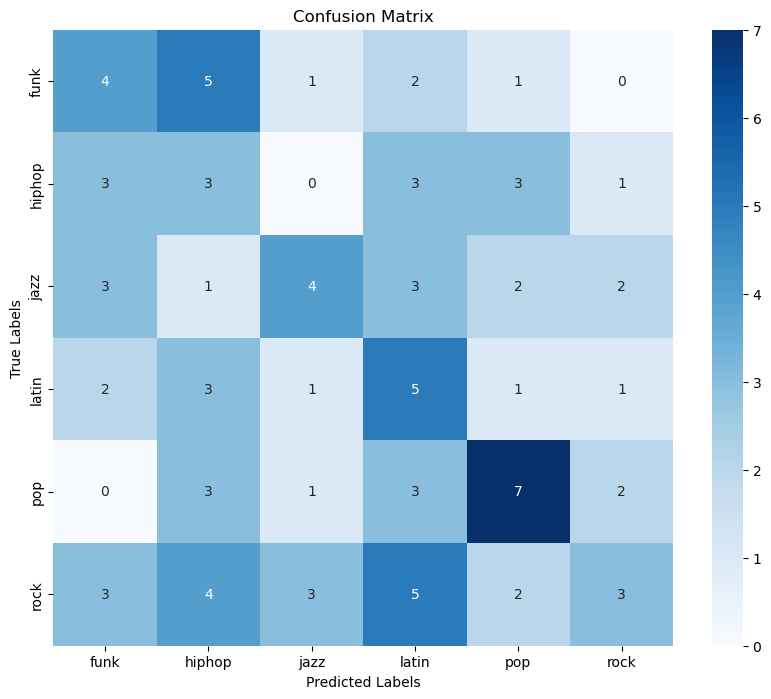

<Figure size 640x480 with 0 Axes>

In [61]:
report, h_loss = evaluate_model(true_classes, predicted_classes)
save_evaluation(report, h_loss)

### Baseline Predictions

In [79]:
random_baseline = []
all_5s_baseline = []

for i in range(len(true_classes)):
    random_baseline.append(np.random.randint(0, 6))
    all_5s_baseline.append(5)

Classification Report:
               precision    recall  f1-score   support

        funk       0.15      0.15      0.15        13
      hiphop       0.24      0.31      0.27        13
        jazz       0.07      0.07      0.07        15
       latin       0.15      0.15      0.15        13
         pop       0.17      0.19      0.18        16
        rock       0.29      0.20      0.24        20

    accuracy                           0.18        90
   macro avg       0.18      0.18      0.18        90
weighted avg       0.18      0.18      0.18        90

Hamming Loss: 0.8222222222222222


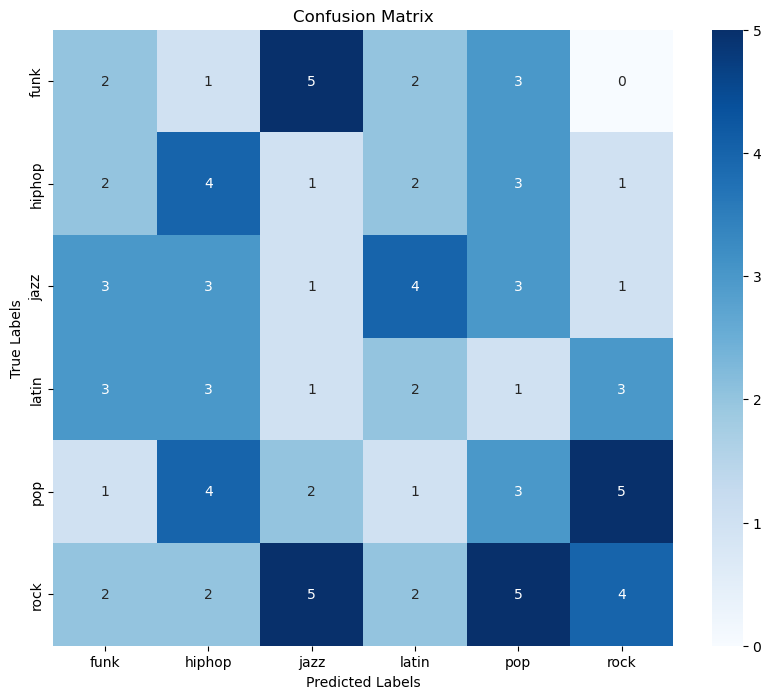

<Figure size 640x480 with 0 Axes>

In [80]:
rnd_report, rnd_h_loss = evaluate_model(true_classes, random_baseline)
save_evaluation(rnd_report, rnd_h_loss, file_suffix='RANDOM_BASELINE')

Classification Report:
               precision    recall  f1-score   support

        funk       0.00      0.00      0.00        13
      hiphop       0.00      0.00      0.00        13
        jazz       0.00      0.00      0.00        15
       latin       0.00      0.00      0.00        13
         pop       0.00      0.00      0.00        16
        rock       0.22      1.00      0.36        20

    accuracy                           0.22        90
   macro avg       0.04      0.17      0.06        90
weighted avg       0.05      0.22      0.08        90

Hamming Loss: 0.7777777777777778


d:\Programmierung\anaconda3\envs\audio_data_science_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Programmierung\anaconda3\envs\audio_data_science_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Programmierung\anaconda3\envs\audio_data_science_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

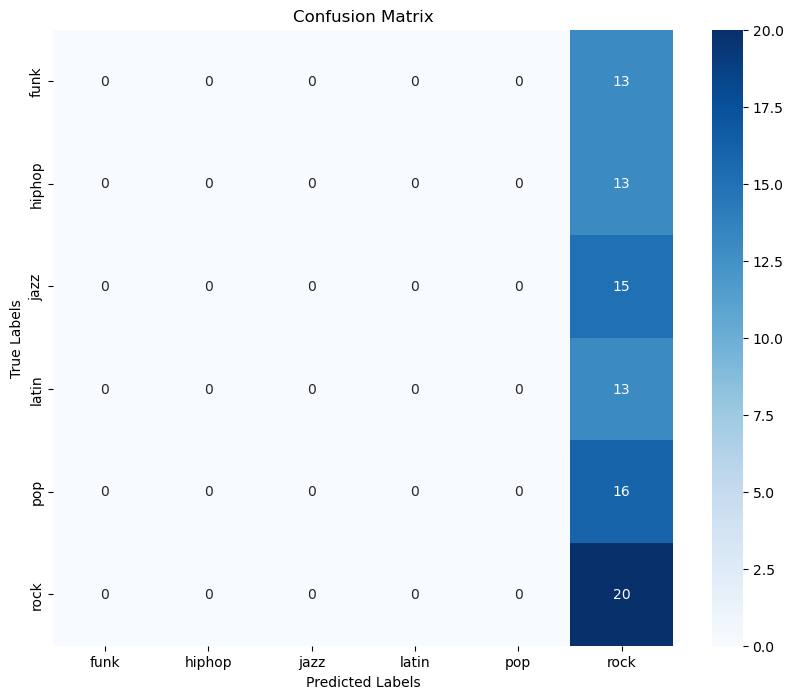

<Figure size 640x480 with 0 Axes>

In [81]:
all_5s_report, all_5s_h_loss = evaluate_model(true_classes, all_5s_baseline)
save_evaluation(all_5s_report, all_5s_h_loss, file_suffix='ALL_5S_BASELINE')